<a href="https://colab.research.google.com/github/jorgg3/Regresion-y-Proyectos-en-Python/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal de una base de datos de precipitaciones.

En este trabajo, se realizará una regresión lineal simple y múltiple de un conjunto de datos relacionada con la precipitación: \
La base de precipitacion.csv contiene el registro de 1827 precipitaciones y 17 variables de interés

- Station: Estación climática que registró el evento
- Name: Nombre del lugar donde se registró la precipitación
- Date: Fecha de la precipitación
= AverageDailyWind,
= = AverageTemp- MaxTemp, MinTemp
- Fastest5MinWindDirection: Dirección del viento más rápido en lapsos de 5 min
- Fastest2MinWindDirection: Dirección del viento más rápido en lapsos de 2 min
= Fastest2MinWindSpeed: Velocidad más rápida del viento en lapsos de 5 min
- Fastest5MinWindSpeed: Velocidad más rápida del viento en lapsos de 2 min
- WeatherType01: Tipo 1 de clima
- WeatherType02: Tipo 2 de clima
- WeatherType08: Tipo 8 de clima

Objetivos

Se desea estudiar la precipitación a partir de las otras variables recolectadas. Para esto se deberá:

- Ajustar un modelo de regresión lineal simple con una variable continua de interés. Reportar la adecuación del modelo, así como la construcción de los intervalos de confianza para la respuesta media y la predicción al 95%.
- Ajustar un modelo de regresión lineal múltiple. Reportar la adecuación del modelo y compararlo con el modelo de regresión lineal simple.

In [ ]:
#Instalamos las librerias
from sklearn.linear_model import LinearRegression #Regresión
import numpy as np #Cálculos numéricos
from sklearn.metrics import r2_score #Ajuste del modelo
import matplotlib.pyplot as plt #Gráficas
import seaborn as sns #Gráficas
import pandas as pd #Manejo de las bases de datos
import statsmodels.api as sm #QQ plot
#Pruebas no paramétricas
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from scipy.stats import kstest, norm


In [ ]:
# Cargar datos
df = pd.read_csv("precipitacion.csv") #Leer el archivo csv
# Filtraremos las filas donde la precipitación sea mayor que 0
df = df[df['Precipitation'] > 0].copy()
df.head(2) #Para ver las primeras 2 filas

,Unnamed: 0,Station,Name,Date,AverageDailyWind,PeakGustTime,Precipitation,AverageTemp,MaxTemp,MinTemp,Fastest5MinWindDirection,Fastest2MinWindDirection,Fastest2MinWindSpeed,Fastest5MinWindSpeed,WeatherType01,WeatherType02,WeatherType08
3,4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,60.941633,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,5,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,56.158671,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [ ]:
# Seleccionar variables
variable_x = "AverageDailyWind"
variable_y = "Precipitation"

Ecuación de la recta: y =  0.21 x +  -0.14
Coeficiente de correlación:  0.581
Coeficiente de determinación:  0.338


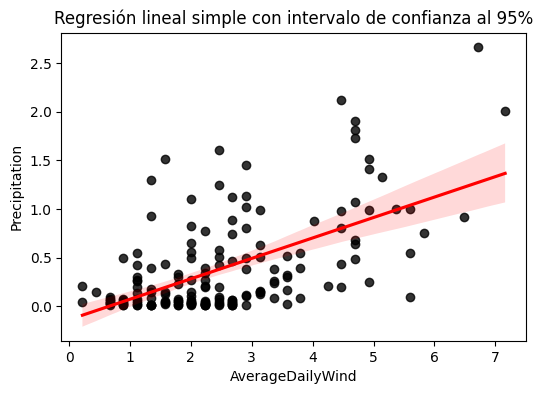

In [ ]:
# Generar análisis
modelo = LinearRegression() #Creamos el modelo de regresión

# Limpiamos la base para eliminar las columnas en donde no haya valores (NaN)
df_cleaned = df.dropna(subset=[variable_x, variable_y])

modelo.fit(df_cleaned[[variable_x]], df_cleaned[variable_y]) #Entrenamos el modelo
print ('Ecuación de la recta: y = ', round(modelo.coef_[0],3),'x + ', round(modelo.intercept_,3))#Obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', round(np.corrcoef(df_cleaned[variable_x], df_cleaned[variable_y])[0,1], 3))#Obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', round(r2_score(df_cleaned[variable_y], modelo.predict(df_cleaned[[variable_x]])), 3))#obtenemos el coeficiente de determinación
# Gráfica con intervalo de confianza
plt.figure(figsize=(6, 4)) #Tamaño de la gráfica
sns.regplot(x=df_cleaned[variable_x], y=df_cleaned[variable_y], ci=95, line_kws={"color": "red"}, scatter_kws={"color": "black"})
plt.title('Regresión lineal simple con intervalo de confianza al 95%')
plt.show()

 El modelo lineal no se ajusta bien a nuestros datos, lo cual pudimos com
probar al hacer el análisis de sus residuales.

In [ ]:
# Predicciones del modelo que limpiamos anteriormente
df_cleaned['y_pred'] = modelo.predict(df_cleaned[[variable_x]])

# Cálculo de los residuales
df_cleaned['residual'] = df_cleaned[variable_y] - df_cleaned['y_pred']

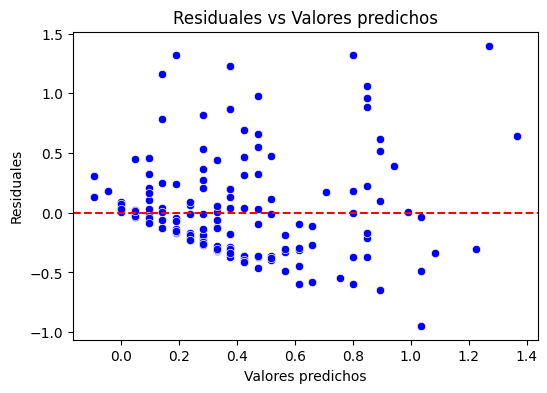

In [ ]:
plt.figure(figsize=(6, 4)) #Tamaño de la gráfica
sns.scatterplot(x=df_cleaned['y_pred'], y=df_cleaned['residual'], color='blue') #Grafica de tipo scatterplot
plt.axhline(0, color='red', linestyle='--') #Se deberia ver "uniforme" con referente al eje x
#Codigo de etiquetas
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores predichos')
plt.show()

Al graficar
 los valores estimados con los reales obtuvimos el gráfico mostrado , el cual
 claramente no presenta un comportamiento uniforme.

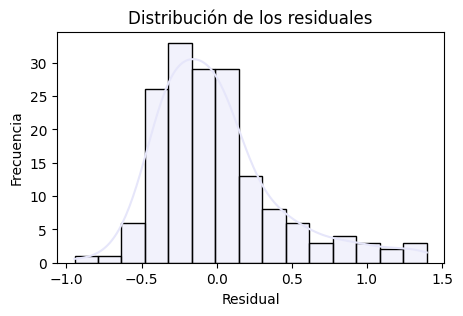

In [ ]:
plt.figure(figsize=(5, 3)) #Tamañp
sns.histplot(df_cleaned['residual'], kde=True, color='lavender') #Histograma
plt.title('Distribución de los residuales') #Titulo y etiquetas
plt.xlabel('Residual')
plt.ylabel('Frecuencia')
plt.show()

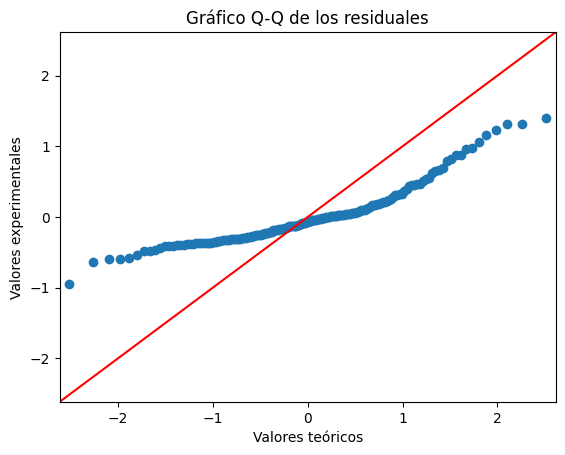

In [ ]:
#QQplot, usamos una librería que no se encontraba en scikitlearn
sm.qqplot(df_cleaned['residual'], line='45')
plt.xlabel('Valores teóricos')
plt.ylabel('Valores experimentales')
plt.title('Gráfico Q-Q de los residuales')
plt.show()

Estas tres gráficas nos dan a entender que no tenemos un buen ajuste del modelo, sin embargo, para tener certeza de los resultados, tenemos que aplicar las pruebas no paramétricas para los resiudales:

In [ ]:
#Prueba no paramétrica de Shapiro.Wilk
stat, p = shapiro(df_cleaned['residual'])

#Prueba no paramétrica de Kolmogorov Smirnov
resid_std = (df_cleaned['residual'] - df_cleaned['residual'].mean()) / df_cleaned['residual'].std()

stat, p = kstest(resid_std, 'norm')
print(f"Kolmogorov-Smirnov: estadístico={stat:.4f}, p-valor={p:.4f}")
print(f"Shapiro-Wilk: estadístico={stat:.4f}, p-valor={p:.4f}")

Kolmogorov-Smirnov: estadístico=0.1400, p-valor=0.0026
Shapiro-Wilk: estadístico=0.1400, p-valor=0.0026


In [ ]:
# estoy probando si los errores del modelo tienen varianza constante (homocedasticidad)
# usando la prueba de Breusch-Pagan

# meto una constante al modelo para que tenga el intercepto
X = sm.add_constant(df_cleaned[variable_x])

# hago el modelo de regresión lineal
modelo = sm.OLS(df_cleaned[variable_y], X).fit()

# saco los residuales del modelo (los errores)
residuos = modelo.resid

# aplico la prueba de Breusch-Pagan
prueba_bp = het_breuschpagan(residuos, X)
#Imprimo
nombres = ['LM stat', 'p-value', 'F stat', 'F p-value']
for nombre, valor in zip(nombres, prueba_bp):
    print(nombre, ":", round(valor, 4))


LM stat : 18.2279
p-value : 0.0
F stat : 20.2161
F p-value : 0.0


Dado que no se cumplen los supuestos de la regresión para los residuales,
 podemos concluir que el modelo no es bueno para nuestros datos.  A continuación
 ajustaremos un modelo de regresión lineal múltiple para compararlo con este.

Dado que hay algunas variables que están relacionadas entre sí, como la
 temperatura mínima y máxima, verificaremos los datos en caso de que haya
 problemas de multicolinealidad. Para eso, graficamos de tipo "ggpair" por pares en las variables
 variables no categ´oricas de nuestro conjunto de datos, cuyo output puede verse
 en la figura:

In [ ]:
#quitamos variables categoricas
variables_numericas = df.select_dtypes(include='number').drop(columns=['Precipitation', 'Unnamed: 0', 'PeakGustTime'])

# Calcular la matriz de covarianza
matriz_correlacion = variables_numericas.corr()

print(matriz_correlacion)

                          AverageDailyWind  AverageTemp   MaxTemp   MinTemp  \
AverageDailyWind                  1.000000    -0.382853 -0.413272 -0.320338   
AverageTemp                      -0.382853     1.000000  0.897369  0.874860   
MaxTemp                          -0.413272     0.897369  1.000000  0.721359   
MinTemp                          -0.320338     0.874860  0.721359  1.000000   
Fastest5MinWindDirection         -0.343463     0.216116  0.271137  0.174766   
Fastest2MinWindDirection         -0.281347     0.139462  0.201704  0.078106   
Fastest2MinWindSpeed              0.730856    -0.295636 -0.244248 -0.297684   
Fastest5MinWindSpeed              0.681159    -0.299953 -0.226098 -0.323290   
WeatherType01                          NaN          NaN       NaN       NaN   
WeatherType02                          NaN          NaN       NaN       NaN   
WeatherType08                          NaN          NaN       NaN       NaN   

                          Fastest5MinWindDirection 

Al descartar las variables que están relacionadas, nos quedaremos de manera númerica con AverageDailyWind, AverageTemp, Fastest2MinDireccion, Fastest5MinDireccion y Fastest5MinSpeed

In [ ]:
X= variables_numericas[['AverageDailyWind', 'AverageTemp', 'Fastest2MinWindDirection', 'Fastest5MinWindDirection', 'Fastest5MinWindSpeed']]
# Eliminamos columnas sin información
X = X.dropna()
X = sm.add_constant(X)
vif_data = pd.DataFrame() #creamos un dataframe que guarda el vif
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #Calcula el vif data

print(vif_data)

                   Variable         VIF
0                     const  228.014268
1          AverageDailyWind    2.483809
2               AverageTemp    1.193064
3  Fastest2MinWindDirection    2.244257
4  Fastest5MinWindDirection    2.430680
5      Fastest5MinWindSpeed    2.150040


El problema del VIF se soluciona entonces, las variables a considerar son 'AverageDailyWind', 'AverageTemp','Fastest5MinWindDirection' y 'Fastest5MinWindSpeed'

Realizamos entonces, el juste del modelo, incluyendo las variables categóricas

In [ ]:
#Para evitar que se eliminen las filas que contienen valores númericos como NA,
#Cambiaremos esos datos por 0:
#quitamos variables sin impoetancia en el modelo
variables_numericas = df.select_dtypes(include='number').drop(columns=['Unnamed: 0', 'PeakGustTime', 'MaxTemp', 'MinTemp','Fastest2MinWindSpeed', 'Fastest2MinWindDirection'])

col1 = ['WeatherType01', 'WeatherType02', 'WeatherType08']
variables_numericas[col1] = variables_numericas[col1].fillna(0).astype(int)
variables_numericas.head(2)

,AverageDailyWind,Precipitation,AverageTemp,Fastest5MinWindDirection,Fastest5MinWindSpeed,WeatherType01,WeatherType02,WeatherType08
3,1.34,0.01,60.941633,270.0,14.1,0,0,0
4,2.46,1.61,56.158671,140.0,16.1,1,1,0


Realizamos ahora sí, la regresión lineal múltiple

In [ ]:
#Definimos las variables
x = variables_numericas.drop(columns='Precipitation')
y = variables_numericas['Precipitation']


In [ ]:
#Calculamos entonces el modelo de regresión
modelo = LinearRegression()
x_cleaned = x.dropna()
y_cleaned = y.loc[x_cleaned.index]
modelo.fit(x_cleaned, y_cleaned)
# Coeficientes de las variables
coeficientes = pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': modelo.coef_
})

# Intercepto
intercepto = modelo.intercept_
#Coeficientes
print("Intercepto:", intercepto)
print(coeficientes)


Intercepto: 0.26707624869295865
                   Variable  Coeficiente
0          AverageDailyWind     0.149252
1               AverageTemp    -0.006083
2  Fastest5MinWindDirection    -0.001114
3      Fastest5MinWindSpeed     0.008460
4             WeatherType01     0.275997
5             WeatherType02     0.357135
6             WeatherType08    -0.133828


In [ ]:
#Calculamos ahora la eficacia del modelo
y_pred = modelo.predict(x_cleaned)
r2 = r2_score(y_cleaned, y_pred)
print("R²:", r2)

R²: 0.44212042618086733


La $R^2$ nos indica que tenemos que el modelo nos daría una respuesta del 44% si es que se cumplen los supuestos, así que, verifiquemos:

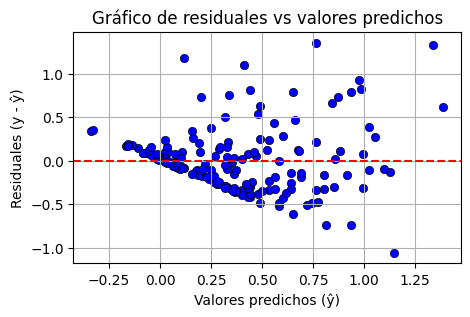

In [ ]:
#Caclulamos los residuales:
residuos = y_cleaned - y_pred
#Los graficamos
plt.figure(figsize=(5, 3)) #Tamaño
sns.scatterplot(x=y_pred, y=residuos, color="blue", edgecolor="black") #Diseño
plt.axhline(0, color='red', linestyle='--') #Ejes y etiquetas
plt.title("Gráfico de residuales vs valores predichos")
plt.xlabel("Valores predichos (ŷ)")
plt.ylabel("Residuales (y - ŷ)")
plt.grid(True)
plt.show()


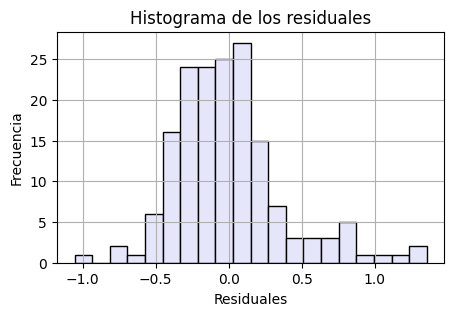

In [ ]:
plt.figure(figsize=(5, 3)) #Tamaño
plt.hist(residuos, bins=20, color='lavender', edgecolor='black') #Ahora usaremos un histograma
plt.title("Histograma de los residuales")
plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [ ]:
#Aplicaremos unicamente las pruebas de normalidad
stat, p = shapiro(residuos)

print(f"Shapiro-Wilk: estadístico={stat:.4f}, p-valor={p:.4f}")
stat, p = kstest(residuos, 'norm')
print(f"Kolmogorov-Smirnov: estadístico={stat:.4f}, p-valor={p:.4f}")

Shapiro-Wilk: estadístico=0.9309, p-valor=0.0000
Kolmogorov-Smirnov: estadístico=0.2778, p-valor=0.0000


A pesar de, haber filtrado ampliamente la base de datos y tener a las variables categóricas ya añadidas, no hemos podido encontrar normalidad en los residuales, es decir, incluso aún cuando el modelo ayude a predecir en un 40% los resultados, no se cumple uno de los supuestos, por lo tanto, no es confiable esta regresión.